In [46]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
%matplotlib inline

In [100]:
N = 100
class PhiTheta:
    def __init__(self, f):
        """Accepts a function of type [phi, theta] -> float"""
        if callable(f):
            self.__array = np.zeros((N,N))
            for x in range(N):
                for y in range(N):
                    phi = x * 2 * pi / N
                    theta = y * 2 * pi / N
                    self.__array[x][y] = f(phi, theta)
        else:
            self.__array = f
    def cos(self):
        return PhiTheta(np.cos(self.__array))
    def abs(self):
        return PhiTheta(np.abs(self.__array))
    def __add__(self, other):
        return PhiTheta(self.__array + other.__array)
    def __sub__(self, other):
        return PhiTheta(self.__array - other.__array)
    def __call__(self, phi, theta):
        assert((type(phi), type(theta)) == (float, float)), str((type(phi), type(theta)))
        phi /= (2 * pi)
        theta /= (2 * pi)
        phi = (phi%1 + 1) % 1
        theta = (theta%1 + 1) % 1
        return self.__array[int(phi * N), int(theta * N)]
    def __getitem__(self, xy):
        return self.__array[xy]
    @property
    def array(self):
        return self.__array
theta = PhiTheta(lambda _, theta : theta)
phi = PhiTheta(lambda phi, _ : phi)

theta_minus_phi = theta - phi
cos_theta_m_phi = theta_minus_phi.cos()
L0 = cos_theta_m_phi.abs() + cos_theta_m_phi

def porus_mirror(transparency_unreg, n):
    def transparency(theta):
        theta %= 2 * pi
        theta += 2 * pi
        theta %= 2 * pi
        return transparency_unreg(theta)
    escape = np.zeros((N,N))
    L = L0
    for x in range(n):
        def trans(phi, theta):
            return transparency(pi + 3 * phi - theta)
        def refl(phi, theta):
            return 1 - trans(phi, theta)
        escape += PhiTheta(lambda phi, theta : L(phi, theta) * trans(phi, theta)).array
        L = PhiTheta(lambda phi, theta: L(pi + 3 * phi - theta, pi + 4 * phi - 2 * theta) * refl(phi,theta))
    plt.imshow(escape)
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = X + Y
    for x in range(n):
        for y in range(n):
            phi, theta = x * 2 * pi / N, y * 2 * pi / N
            

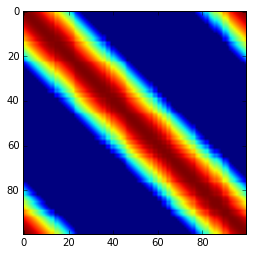

In [101]:
porus_mirror(lambda theta: 1, 3)

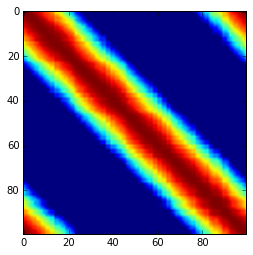

In [102]:
porus_mirror(lambda theta: 0.5, 10)

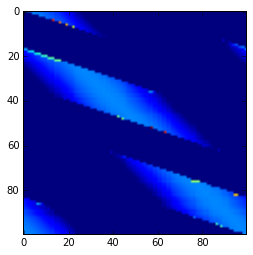

In [104]:
porus_mirror(lambda theta: 1 if abs(theta) < pi else 0, 4)